In [1]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder # LabelEnCoder()
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/Users/aethertsai/Desktop/python/titanic/train.csv")
test = pd.read_csv("/Users/aethertsai/Desktop/python/titanic/test.csv")
submit= pd.read_csv("/Users/aethertsai/Desktop/python/titanic/gender_submission.csv")

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data = train.append(test)

In [9]:
data.reset_index(inplace = True, drop = True)

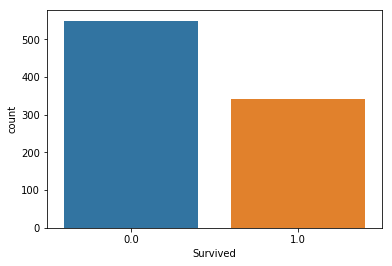

In [10]:
sns.countplot(data["Survived"])

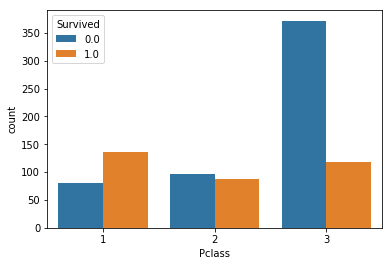

In [11]:
sns.countplot(data["Pclass"], hue = data["Survived"])

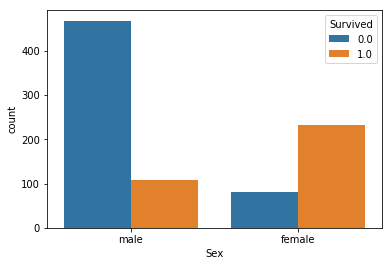

In [12]:
sns.countplot(data["Sex"], hue = data["Survived"])

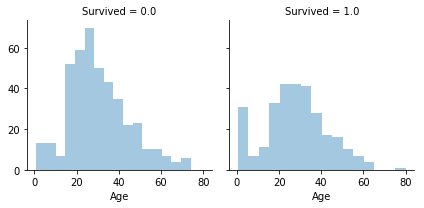

In [13]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

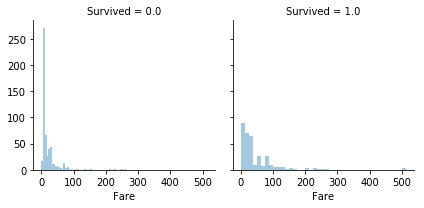

In [14]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

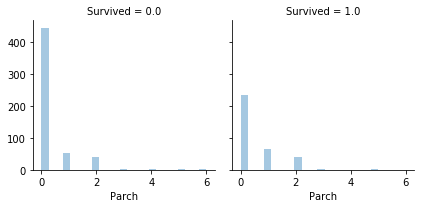

In [15]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

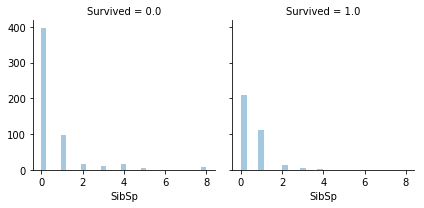

In [16]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)


In [17]:
data['Family_Size'] = data['Parch'] + data['SibSp']

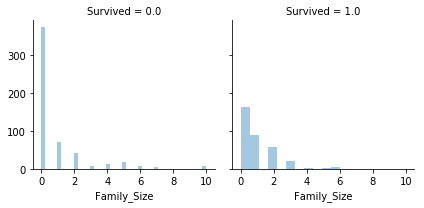

In [18]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

In [19]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]

In [20]:
data['Name'].str.split(", ", expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [21]:
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [22]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]

In [23]:
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [24]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [25]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [26]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [27]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [28]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [29]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [30]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [31]:
data.groupby(["Title2"])["Age"].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [32]:
data.groupby(["Title2","Pclass"])["Age"].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [33]:
pd.crosstab(data["Title2"],data["Sex"]).T.style.background_gradient(cmap = "summer_r")

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [34]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] 
                                           if not x.isdigit() else 'X')


In [35]:
data["Ticket_info"].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

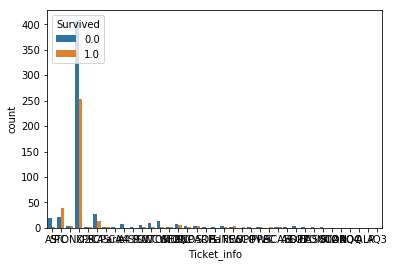

In [36]:
sns.countplot(data["Ticket_info"], hue = data["Survived"])

In [37]:
data["Embarked"] = data["Embarked"].fillna("S")

In [38]:
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

In [40]:
data["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [55]:
data["Cabin"] = data["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else "Nocabin")

In [42]:
data["Cabin"].unique()

array(['Nocabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

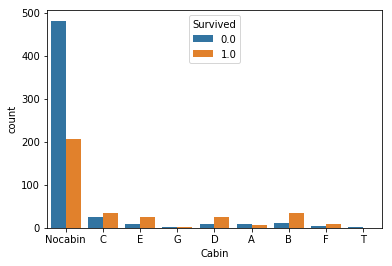

In [43]:
sns.countplot(data["Cabin"], hue = data["Survived"])

In [44]:
data["Sex"] = data["Sex"].astype('category').cat.codes
data["Embarked"] = data["Embarked"].astype("category").cat.codes
data["Pclass"] = data["Pclass"].astype("category").cat.codes
data["Title1"] = data["Title1"].astype("category").cat.codes
data["Title2"] = data["Title2"].astype("category").cat.codes
data["Cabin"] = data["Cabin"].astype("category").cat.codes
data["Ticket_info"] = data["Ticket_info"].astype("category").cat.codes

In [45]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [46]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

In [47]:
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [48]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]


In [49]:
dataTrain.head(5)

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.0,2,7.2500,2,1,1,2,2,7
264,1.0,38.0,0,71.2833,0,0,1,3,14,2
265,1.0,26.0,2,7.9250,2,0,0,1,31,7
266,1.0,35.0,2,53.1000,0,0,1,3,36,2
267,0.0,35.0,2,8.0500,2,1,0,2,36,7


In [50]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators= 1500,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [51]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.266647
2,Fare,0.162914
6,Title2,0.151276
0,Age,0.132808
3,Pclass,0.089523
5,Family_Size,0.070369
8,Cabin,0.068538
7,Ticket_info,0.031879
1,Embarked,0.026045


In [53]:
rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)